In [1]:
import numpy as np
x= np.array(12)
x

array(12)

In [2]:
x.ndim

0

In [3]:
x = np.array([12,3,6,14])

In [4]:
x

array([12,  3,  6, 14])

In [5]:
x.ndim

1

In [24]:
x = np.array([[5,78,2,34,0],
             [6,79,3,35,1],
             [7,80,4,36,2]])

In [25]:
x.shape

(3, 5)

In [26]:
x.shape[0]

3

In [8]:
x.ndim

2

In [9]:
x= np.array([[[5,78,2,34,0],
              [6,79,3,35,1],
              [7,80,4,36,2]],
             [[5,78,2,34,0],
              [6,79,3,35,1],
              [7,80,4,36,2]],
             [[5,78,2,34,0],
              [6,79,3,35,1],
              [7,80,4,36,2]]])

In [10]:
x.ndim

3

In [11]:
from keras.datasets import mnist
(train_images, train_labels),(test_images, test_labels)= mnist.load_data()

Using TensorFlow backend.


In [12]:
print(train_images.ndim)

3


In [13]:
print(train_images.shape)

(60000, 28, 28)


In [14]:
print(train_images.dtype)

uint8


In [15]:
digit = train_images[4]

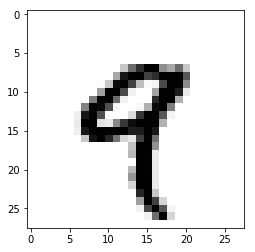

In [23]:
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [17]:
my_slice = train_images[10:100]

In [18]:
print(my_slice.shape)

(90, 28, 28)


In [19]:
my_slice = train_images[:,7:-7,7:-7]

In [20]:
print(my_slice.shape)

(60000, 14, 14)


In [21]:
batch=train_images[:128]

In [22]:
batch.shape

(128, 28, 28)

In [27]:
def naive_relu(x):
    assert len(x.shape)==2
    x=x.copy();
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
                x[i,j]= max[x[i,j],0]
    return x

In [29]:
def naive_add(x,y):
    assert len(x.shape)==2
    assert x.shape==y.shape
    
    x=x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
                x[i,j] += y[i,j]
    return x

In [30]:
z = x+y

NameError: name 'y' is not defined

In [31]:
z = np.maximum(z,0.)

NameError: name 'z' is not defined

In [33]:
def naive_add_matrix_and_vector(x,y):
    assert len(x.shape)==2
    assert len(y.shape)==1
    assert x.shape[1]==y.shape[0]
    x=x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i,j]+=y[j]
    return x

In [34]:
x = np.random.random((64,3,32,10))

In [35]:
y = np.random.random((32,10))

In [36]:
z = np.maximum(x,y)

In [37]:
z.shape

(64, 3, 32, 10)

In [38]:
z = np.dot(x,y)

ValueError: shapes (64,3,32,10) and (32,10) not aligned: 10 (dim 3) != 32 (dim 0)

In [39]:
def naive_vector_dot(x,y):
    assert len(x.shape)==1
    assert len(y.shape)==1
    assert x.shape[0]==y.shape[0]
    z=0
    for i in range(x.shape[0]):
        z+=x[i]*y[i]
    return z

In [40]:
def naive_matrix_vector_dot(x,y):
    assert len(x.shape)==2
    assert len(y.shape)==1
    assert x.shape[1]==y.shape[0]
    z= np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i]+=x[i,j]*y[j]
    return z

In [41]:
x = np.array([[1,2,3],[2,3,4]])
y = np.array([2,3,4])

In [42]:
z = naive_matrix_vector_dot(x,y)

In [43]:
z

array([20., 29.])

In [44]:
def naive_matrix_dot(x,y):
    assert len(x.shape)==2
    assert len(y.shape)==2
    assert x.shape[1]==y.shape[0]
    z=np.zeros((x.shape[0],y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i,:]
            column_y= y[:,j]
            z[i,j]= naive_vector_dot(row_x,column_y)
    return z